# Recent improvements to ore_algebra

Marc Mezzarobba  
CNRS, Sorbonne Université

FastRelax Final Workshop, Lyon, 2019-05-23

### ore_algebra

Sage implementation of Ore polynomials and D-finite functions

**Source code:** <https://github.com/mkauers/ore_algebra>  

    $ sage -pip install git+https://github.com/mkauers/ore_algebra/
    
**Documentation:**  <http://www.algebra.uni-linz.ac.at/people/mkauers/ore_algebra>

### History & Contributors
* **Kauers, Jaroschek, Johansson 2013:** Initial implementation
* **Mezzarobba ~2015–:** Numerical solutions of ODEs
* **Kauers 2015–, Mezzarobba 2018–:** Multivariate operators
* **Schwaiger 2017, Hofstadler 2017–2018:** “D-finite function” objects

### Pre-existing features

* Basic arithmetic (diff, shift, qdiff, qshift, custom)
* Gcrd, lclm, D-finite closure properties
* Conversions (diff. eq. ↔ rec., etc.)
* Polynomial & rational solutions
* First-order right factors
* Formal solutions at singularities
* Desingularization
* Guessing
* Numerical solutions & connection matrices

### Recent improvements
* Multivariate closure properties
* Creative telescoping
* D-finite functions (alpha quality)
* Numerics: faster, better support for reg. sing. points, large operators, high precision

### Differential operators: Basic arithmetic

In [1]:
from ore_algebra import OreAlgebra

In [2]:
Pol.<x> = PolynomialRing(QQ)
Dop.<Dx> = OreAlgebra(Pol)

In [3]:
Dop

Univariate Ore algebra in Dx over Univariate Polynomial Ring in x over Rational Field

In [4]:
Dx*x

x*Dx + 1

In [5]:
Dx(sin(x))

cos(x)

In [6]:
(x*Dx)(sin(x))

x*cos(x)

### Recurrence operators

In [7]:
Poln.<n> = PolynomialRing(GF(17))
Rop.<Sn> = OreAlgebra(Poln)
Rop

Univariate Ore algebra in Sn over Univariate Polynomial Ring in n over Finite Field of size 17

In [8]:
Sn*n

(n + 1)*Sn

In [9]:
(Sn - n)**10

Sn^10 + (7*n + 6)*Sn^9 + (11*n^2 + 3*n + 2)*Sn^8 + (16*n^3 + 15*n^2 + 4*n + 2)*Sn^7 + (6*n^4 + 4*n^3 + 2*n^2 + 8*n + 13)*Sn^6 + (3*n^5 + 12*n^4 + 13*n^3 + 10*n^2 + 3*n + 9)*Sn^5 + (6*n^6 + 4*n^5 + 16*n^4 + 10*n^3 + 11*n^2 + 10*n + 3)*Sn^4 + (16*n^7 + 15*n^6 + 7*n^5 + 4*n^4 + 5*n^3 + 16*n^2 + 10*n + 3)*Sn^3 + (11*n^8 + 3*n^7 + 8*n^6 + 6*n^5 + 16*n^4 + 12*n^3 + 3*n^2 + 1)*Sn^2 + (7*n^9 + 6*n^8 + 16*n^7 + 11*n^6 + 3*n^5 + 11*n^4 + 16*n^3 + 6*n^2 + 7*n + 16)*Sn + n^10

### ⚐ D-Finite functions as objects  
C. Hofstadler, experimental

In [10]:
from ore_algebra.dfinite_function import DFiniteFunctionRing, UnivariateDFiniteFunction

In [11]:
Fun = DFiniteFunctionRing(Dop);  Fun

Ring of D-finite functions over Univariate Polynomial Ring in x over Rational Field

In [12]:
my_ai = Fun(airy_ai(x))

In [13]:
my_ai[10]

-1/136080*3^(2/3)/gamma(1/3)

In [14]:
my_ai(1)

[0.13529241631288141552414742351546630617494414298833 +/- 1.49e-51]

In [15]:
my_ai(x^2)

Univariate D-finite function defined by the annihilating operator x*Dx^2 - Dx - 4*x^5 and the coefficient sequence defined by (n^10 + 22*n^9 + 186*n^8 + 708*n^7 + 777*n^6 - 2562*n^5 - 7876*n^4 - 3928*n^3 + 6912*n^2 + 5760*n)*Sn^6 - 4*n^8 - 48*n^7 - 168*n^6 + 924*n^4 + 1008*n^3 - 752*n^2 - 960*n and {0: 1/3*3^(1/3)/gamma(2/3), 1: 0, 2: -1/3*3^(2/3)/gamma(1/3), 3: 0, 4: 0, 5: 0, 6: 1/18*3^(1/3)/gamma(2/3), 7: 0, 8: -1/36*3^(2/3)/gamma(1/3)}

In [16]:
from ore_algebra.examples.stdfun import mittag_leffler_e
ivp = mittag_leffler_e(1/3, 1)
ivp

IVP(pt=0, dop=1/3*Dx^3 - x^2*Dx^2 - 4*x*Dx - 2, ini=[1, 1/gamma(4/3), 1/gamma(5/3)])

In [17]:
my_e = UnivariateDFiniteFunction(Fun, ivp.dop, ivp.ini)

In [18]:
my_ai*my_e

Univariate D-finite function defined by the annihilating operator (-81*x^9 - 414*x^6 - 52*x^3 - 24)*Dx^6 + (486*x^11 + 3213*x^8 + 2796*x^5 + 300*x^2)*Dx^5 + (-729*x^13 - 3483*x^10 + 5148*x^7 - 3732*x^4 + 2064*x)*Dx^4 + (-6075*x^12 - 47574*x^9 - 33384*x^6 - 7464*x^3 + 1968)*Dx^3 + (1458*x^14 + 4293*x^11 - 53604*x^8 - 2244*x^5 - 41088*x^2)*Dx^2 + (7047*x^13 + 60075*x^10 + 71808*x^7 + 136452*x^4 - 31872*x)*Dx - 729*x^15 - 2430*x^12 + 31752*x^9 - 22028*x^6 + 46720*x^3 - 2160 and the coefficient sequence defined by (-24*n^33 - 7848*n^32 - 1217904*n^31 - 119265120*n^30 - 8265240096*n^29 - 430836655392*n^28 - 17522874893376*n^27 - 569149922442240*n^26 - 14980851481012560*n^25 - 322206414583126320*n^24 - 5678126299596310560*n^23 - 81721683804628296000*n^22 - 949652588246790733920*n^21 - 8681713167577264503840*n^20 - 58748680805012448505920*n^19 - 242135956214206048051200*n^18 + 108488260436315928944040*n^17 + 10476807873210919884061080*n^16 + 84066023678942093501383440*n^15 + 32840707243089296

In [19]:
my_e(1)

[7.28355749378782728852876426824018405440330223126660 +/- 8.00e-51]

In [20]:
ivp.dop.numerical_solution(ivp.ini, [0,1], 1e-50)

[7.28355749378782728852876426824018405440330223126660 +/- 8.00e-51]

### Kreweras walks
Adapted from an exercise by B. Salvy & A. Bostan

In [21]:
@cached_function
def w(n, i, j):
    if i < 0 or j < 0:
        return 0
    elif n == 0:
        return 1 if i == j == 0 else 0
    else:
        return w(n-1,i-1,j-1)+w(n-1,i,j+1)+w(n-1,i+1,j)

In [22]:
Pol.<x,y> = ZZ[]
terms = [Pol({(i,j): w(k,i,j) for i in range(k+1) for j in range(k+1)})(y=0)
         for k in range(90)]
terms

[1,
 0,
 x,
 2,
 2*x^2,
 8*x,
 5*x^3 + 16,
 30*x^2,
 14*x^4 + 96*x,
 112*x^3 + 192,
 42*x^5 + 480*x^2,
 420*x^4 + 1408*x,
 132*x^6 + 2240*x^3 + 2816,
 1584*x^5 + 8320*x^2,
 429*x^7 + 10080*x^4 + 23296*x,
 6006*x^6 + 44800*x^3 + 46592,
 1430*x^8 + 44352*x^5 + 153600*x^2,
 22880*x^7 + 228480*x^4 + 417792*x,
 4862*x^9 + 192192*x^6 + 913920*x^3 + 835584,
 87516*x^8 + 1123584*x^5 + 2976768*x^2,
 16796*x^10 + 823680*x^7 + 5107200*x^4 + 7938048*x,
 335920*x^9 + 5381376*x^6 + 19066880*x^3 + 15876096,
 58786*x^11 + 3500640*x^8 + 27320832*x^5 + 59924480*x^2,
 1293292*x^10 + 25259520*x^7 + 114250752*x^4 + 157515776*x,
 208012*x^12 + 14780480*x^9 + 141453312*x^6 + 406224896*x^3 + 315031552,
 4992288*x^11 + 116688000*x^8 + 652861440*x^5 + 1243545600*x^2,
 742900*x^13 + 62078016*x^10 + 713856000*x^7 + 2571878400*x^4 + 3233218560*x,
 19315400*x^12 + 532097280*x^9 + 3597834240*x^6 + 8817868800*x^3 + 6466437120,
 2674440*x^14 + 259598976*x^11 + 3528645120*x^8 + 15498362880*x^5 + 26453606400*x^2,
 74884

### Guessing differential operators

In [23]:
from ore_algebra.guessing import guess
%time dop = guess(terms, OreAlgebra(ZZ['x']['t'], 'Dt'))
dop

CPU times: user 564 ms, sys: 4.14 ms, total: 568 ms
Wall time: 566 ms


((31104*x^6 - 3888*x^3 - 972)*t^12 + (7776*x^4 + 3888*x)*t^11 + (-6912*x^8 - 8208*x^5 - 4320*x^2)*t^10 + (3168*x^6 - 936*x^3 + 36)*t^9 + (4572*x^4 - 144*x)*t^8 + (256*x^8 - 2504*x^5 + 160*x^2)*t^7 + (272*x^6 + 40*x^3)*t^6 - 180*x^4*t^5 + 104*x^5*t^4 - 16*x^6*t^3)*Dt^4 + ((497664*x^6 - 62208*x^3 - 15552)*t^11 + (77760*x^4 + 59292*x)*t^10 + (-124416*x^8 - 93312*x^5 - 57348*x^2)*t^9 + (80928*x^6 - 28692*x^3 + 414)*t^8 + (-12096*x^7 + 78228*x^4 - 1548*x)*t^7 + (3456*x^8 - 40248*x^5 + 1404*x^2)*t^6 + (3712*x^6 + 944*x^3)*t^5 + (448*x^7 - 2146*x^4)*t^4 + 1100*x^5*t^3 - 168*x^6*t^2)*Dt^3 + ((2239488*x^6 - 279936*x^3 - 69984)*t^10 + (139968*x^4 + 253692*x)*t^9 + (-635904*x^8 - 262656*x^5 - 205632*x^2)*t^8 + (525888*x^6 - 186696*x^3 + 1170)*t^7 + (-117504*x^7 + 362700*x^4 - 4005*x)*t^6 + (12672*x^8 - 171528*x^5 + 2400*x^2)*t^5 + (13008*x^6 + 4497*x^3)*t^4 + (3360*x^7 - 6486*x^4)*t^3 + 2856*x^5*t^2 - 432*x^6*t)*Dt^2 + ((2985984*x^6 - 373248*x^3 - 93312)*t^9 + (-93312*x^4 + 320760*x)*t^8 + (-9676

### Guessing algebraic equations

In [24]:
%time algeq = guess(terms, OreAlgebra(ZZ['x']['t'], 'C'))
algeq

CPU times: user 950 ms, sys: 189 ms, total: 1.14 s
Wall time: 1.13 s


16*x^6*t^10*C^6 + (96*x^4*t^9 - 48*x^5*t^8)*C^5 + ((48*x^5 + 192*x^2)*t^8 - 192*x^3*t^7 + 56*x^4*t^6)*C^4 + ((192*x^3 + 128)*t^7 + (-96*x^4 - 192*x)*t^6 + 128*x^2*t^5 - 32*x^3*t^4)*C^3 + ((48*x^4 + 192*x)*t^6 - 264*x^2*t^5 + (64*x^3 + 32)*t^4 - 32*x*t^3 + 9*x^2*t^2)*C^2 + (96*x^2*t^5 + (-48*x^3 - 144)*t^4 + 104*x*t^3 - 16*x^2*t^2 + 2*t - x)*C + (16*x^3 + 108)*t^4 - 72*x*t^3 + 8*x^2*t^2 - 2*t + x

### The Voigt profile

$$V(x) = \frac{1}{σ \sqrt{2π}} \frac{λ}{π} \int_{-∞}^{+∞} \frac{\exp\bigl(-(u-x)²/(2σ²)\bigr)}{u² + λ²} \mathrm du,
\qquad σ = 1, λ = 1/2$$

In [25]:
P.<x, u> = PolynomialRing(QQ)
A.<Dx, Du> = OreAlgebra(P)
f = exp(-(u-x)^2/2)/(u^2 + 1/4)

In [26]:
op1 = Dx + x - u
op1(f)

0

In [27]:
op2 = (4*u^2 + 1)*Du + (4*u^3 - 4*u^2*x + 9*u - x)
op2(f).simplify_full()

0

### Creative telescoping

$$V(x) = \frac{1}{(2π)^{3/2}} \int_{-∞}^{+∞} f(x,u) \, \mathrm du, \qquad f(x,u) = \frac{\exp\bigl(-(u-x)²/2\bigr)}{u² + 1/4}$$

In [28]:
ideal = A.ideal([op1, op2]); ideal

Left Ideal (Dx + x - u, (4*u^2 + 1)*Du - 4*x*u^2 + 4*u^3 - x + 9*u) of Multivariate Ore algebra in Dx, Du over Fraction Field of Multivariate Polynomial Ring in x, u over Rational Field

**Idea:**
Find a pair $(P,Q)$ such that
$P - D_u Q \in I$
and $P$ does not depend on $u$.

**Then**
$P\left(\int f \, \mathrm du \right) = \int P(f) \, \mathrm du = \int (D_u Q(f)) \, \mathrm du = 0$.

In [29]:
[tel], [cert] = ideal.ct(Du)
tel, cert

(-4*Dx^3 - 8*x*Dx^2 + (-4*x^2 - 13)*Dx - 8*x, 4*u^2 + 1)

In [30]:
(tel-Du*cert).reduce(ideal)

0

In [31]:
ini = [(1/2*exp(1/8)*erfc(1/4*2^(1/2))*2^(1/2)/pi^(1/2)), 0,
       1/2*(1/2/pi-5/8*exp(1/8)*erfc(1/4*2^(1/2))*2^(1/2)/pi^(1/2))]
tel.numerical_solution(ini, [0,2])

[0.08242408278858694 +/- 2.82e-18]

### Another walk model
After A. Bostan, F. Chyzak, M. van Hoeij, M. Kauers and L. Pech, *[Hypergeometric expressions for generating functions of walks with small steps in the quarter plane](https://arxiv.org/pdf/1606.02982)*, 2017.

In [32]:
from ore_algebra.examples import ssw
Rat = Frac(PolynomialRing(ZZ,'u,v,t'))
q = Rat(ssw.rat[10](x=1,y=1))
q

(-u^3*v^2 - u^2*v^2 + u^3 - u*v^2 + 2*u^2 - v^2 + 2*u + 1)/(u^4*v^3*t + u^3*v^3*t + 2*u^2*v^3*t - u^3*v^2 - u^4*t + u^3*v*t + u*v^3*t + u^3*v - u^2*v^2 - 2*u^3*t + u^2*v*t + v^3*t + u^2*v - u*v^2 - 3*u^2*t + u*v*t + u*v - 2*u*t - t)

In [33]:
A.<Du,Dv,Dt> = OreAlgebra(Rat)

In [34]:
ideal = A.ideal([q*D - D(q) for D in Du,Dv,Dt])
ideal

Left Ideal ((-u^7*v^4*t - u^7*v^3*t - 2*u^6*v^4*t - 2*u^6*v^3*t - 4*u^5*v^4*t + u^6*v^3 + u^7*v*t - 4*u^5*v^3*t - 5*u^4*v^4*t + 2*u^5*v^3 + u^7*t + 3*u^6*v*t - 5*u^4*v^3*t - 5*u^3*v^4*t - u^6*v + 3*u^4*v^3 + 4*u^6*t + 6*u^5*v*t - 5*u^3*v^3*t - 4*u^2*v^4*t - 3*u^5*v + 3*u^3*v^3 + 9*u^5*t + 8*u^4*v*t - 4*u^2*v^3*t - 2*u*v^4*t - 5*u^4*v + 2*u^2*v^3 + 13*u^4*t + 8*u^3*v*t - 2*u*v^3*t - v^4*t - 5*u^3*v + u*v^3 + 13*u^3*t + 6*u^2*v*t - v^3*t - 3*u^2*v + 9*u^2*t + 3*u*v*t - u*v + 4*u*t + v*t + t)*Du - u^6*v^4*t - u^6*v^3*t - 2*u^5*v^4*t - 2*u^5*v^3*t - 2*u^4*v^4*t + u^6*v*t + 2*u^5*v^2*t - 2*u^4*v^3*t - 4*u^3*v^4*t + u^6*t + 4*u^5*v*t + 4*u^4*v^2*t - 4*u^3*v^3*t - u^2*v^4*t + 4*u^5*t + 6*u^4*v*t + 2*u^3*v^2*t - u^2*v^3*t - 2*u*v^4*t - u^4*v + 3*u^2*v^3 + 7*u^4*t + 6*u^3*v*t - 2*u^2*v^2*t - 2*u*v^3*t - 2*u^3*v + 2*u*v^3 + 8*u^3*t + 2*u^2*v*t - 4*u*v^2*t - 3*u^2*v + v^3 + 5*u^2*t - 2*v^2*t - 2*u*v + 2*u*t - v*t - v, (-u^5*v^5*t - u^4*v^5*t + u^5*v^3*t - 2*u^3*v^5*t + u^4*v^4 + u^5*v^2*t + u^4*v

### ⚐ Fast creative telescoping

In [35]:
%time tel1, _ = ideal.ct(Dv)
tel1

CPU times: user 1.87 s, sys: 52.6 ms, total: 1.93 s
Wall time: 1.96 s


[(-9*u^9*t^4 - 24*u^8*t^4 - 3*u^8*t^3 - 37*u^7*t^4 - u^7*t^3 - 37*u^6*t^4 + 5*u^7*t^2 - u^6*t^3 - 15*u^5*t^4 + 6*u^6*t^2 - 3*u^5*t^3 + 15*u^4*t^4 - u^6*t + u^5*t^2 + 3*u^4*t^3 + 37*u^3*t^4 - u^5*t - u^4*t^2 + u^3*t^3 + 37*u^2*t^4 + u^4*t - 6*u^3*t^2 + u^2*t^3 + 24*u*t^4 + u^3*t - 5*u^2*t^2 + 3*u*t^3 + 9*t^4)*Dt^2 + (-2*u^8 - 4*u^7 - 6*u^6 - 6*u^5 - 4*u^4 - 2*u^3)*Du + (-36*u^9*t^3 - 96*u^8*t^3 - 12*u^8*t^2 - 148*u^7*t^3 - 6*u^7*t^2 - 148*u^6*t^3 + 16*u^7*t - 6*u^6*t^2 - 60*u^5*t^3 + 20*u^6*t - 12*u^5*t^2 + 60*u^4*t^3 - 2*u^6 + 4*u^5*t + 12*u^4*t^2 + 148*u^3*t^3 - 2*u^5 - 4*u^4*t + 6*u^3*t^2 + 148*u^2*t^3 + 2*u^4 - 20*u^3*t + 6*u^2*t^2 + 96*u*t^3 + 2*u^3 - 16*u^2*t + 12*u*t^2 + 36*t^3)*Dt - 18*u^9*t^2 - 48*u^8*t^2 - 6*u^8*t - 74*u^7*t^2 - 4*u^7*t - 74*u^6*t^2 + 4*u^7 - 4*u^6*t - 30*u^5*t^2 + 4*u^6 - 6*u^5*t + 30*u^4*t^2 + 6*u^4*t + 74*u^3*t^2 - 6*u^4 + 4*u^3*t + 74*u^2*t^2 - 8*u^3 + 4*u^2*t + 48*u*t^2 - 6*u^2 + 6*u*t + 18*t^2,
 (-9*u^10*t^3 - 33*u^9*t^3 - 3*u^9*t^2 - 79*u^8*t^3 - 4*u^8*

In [36]:
%time tel2, _ = tel1[0].parent().ideal(tel1).ct(Du)
tel2   # HolonomicFunctions.m: ≥ 1 min

CPU times: user 12.9 s, sys: 90.3 ms, total: 13 s
Wall time: 13.1 s


[(1892352000*t^24 + 9122611200*t^23 - 18640527360*t^22 - 58034765824*t^21 - 38532706304*t^20 + 41965621248*t^19 + 94071750144*t^18 + 56013030400*t^17 - 5294450432*t^16 - 21996570880*t^15 - 10952369952*t^14 - 2543280896*t^13 - 537441232*t^12 - 276140992*t^11 - 112877022*t^10 - 19917936*t^9 + 1121240*t^8 + 1056920*t^7 + 134035*t^6 - 5391*t^5 - 2254*t^4 - 103*t^3 + 3*t^2)*Dt^5 + (47308800000*t^23 + 227888332800*t^22 - 542727905280*t^21 - 1484019662848*t^20 - 767620100096*t^19 + 1085290090496*t^18 + 1896743070208*t^17 + 918495748096*t^16 - 215512785664*t^15 - 427218085376*t^14 - 200103936864*t^13 - 53308965120*t^12 - 16198105488*t^11 - 7684582384*t^10 - 2788409498*t^9 - 526917856*t^8 - 11674372*t^7 + 14725960*t^6 + 2406665*t^5 + 42072*t^4 - 17460*t^3 - 836*t^2 + 27*t)*Dt^4 + (378470400000*t^22 + 1821691084800*t^21 - 4964213882880*t^20 - 12009478135808*t^19 - 4381901037568*t^18 + 8936076752896*t^17 + 11847464069120*t^16 + 4115996062720*t^15 - 2219866571776*t^14 - 2632683934976*t^13 - 112181

### Pólya walks in dimension 15

(Thanks to B. Salvy)

**Task:** Compute a certain solution at $z=1$

In [37]:
from ore_algebra.examples import polya
dim = 15
polya.dop[dim]

(269276305858560000*z^30 - 80950584950784000*z^28 + 3629735201193984*z^26 - 57080630763520*z^24 + 409981265408*z^22 - 1499829760*z^20 + 2871232*z^18 - 2720*z^16 + z^14)*Dz^15 + (60587168818176000000*z^29 - 16999622839664640000*z^27 + 707798364232826880*z^25 - 10274513537433600*z^23 + 67646908792320*z^21 - 224974464000*z^19 + 387616320*z^17 - 326400*z^15 + 105*z^13)*Dz^14 + (5937542544181248000000*z^28 - 1551046657578762240000*z^26 + 59789931630571929600*z^24 - 798278106947641344*z^22 + 4796169345443840*z^20 - 14416495588352*z^18 + 22181540160*z^16 - 16423904*z^14 + 4550*z^12)*Dz^13 + (334481563322210304000000*z^27 - 81131900756901396480000*z^25 + 2886264219850496409600*z^23 - 35303727569401454592*z^21 + 192591205900620800*z^19 - 519787439069184*z^17 + 707833651200*z^15 - 454991264*z^13 + 106470*z^11)*Dz^12 + (12041336279599570944000000*z^26 - 2704250458682470563840000*z^24 + 88474218684064461619200*z^22 - 987113006841956179968*z^20 + 4862067116732345856*z^18 - 11694546001056256*z^16 + 

### ⚐ Numerics: Logarithms

In [38]:
polya.dop[dim].leading_coefficient().factor()

(2*z - 1) * (2*z + 1) * (6*z - 1) * (6*z + 1) * (10*z - 1) * (10*z + 1) * (14*z - 1) * (14*z + 1) * (18*z - 1) * (18*z + 1) * (22*z - 1) * (22*z + 1) * (26*z - 1) * (26*z + 1) * (30*z - 1) * (30*z + 1) * z^14

In [39]:
polya.dop[dim].local_basis_monomials(0)

[1/87178291200*log(z)^14,
 1/6227020800*log(z)^13,
 1/479001600*log(z)^12,
 1/39916800*log(z)^11,
 1/3628800*log(z)^10,
 1/362880*log(z)^9,
 1/40320*log(z)^8,
 1/5040*log(z)^7,
 1/720*log(z)^6,
 1/120*log(z)^5,
 1/24*log(z)^4,
 1/6*log(z)^3,
 1/2*log(z)^2,
 log(z),
 1]

In [40]:
ini = [0]*(dim - 1) + [1]
# 90 s in Nov. 2017
%time polya.dop[dim].numerical_solution(ini, [0,1/(2*dim)], 1e-100)

CPU times: user 4.3 s, sys: 43.5 ms, total: 4.34 s
Wall time: 4.31 s


[1.03720412092152168870320272201726012686492785463956609556680543456793165591178031741211 +/- 7.28e-87]

### Iterated integrals
After J. Ablinger, J. Blümlein, C. G. Raab, and C. Schneider,
*[Iterated Binomial Sums and their Associated Iterated Integrals](http://arxiv.org/pdf/1407.1822)*,
Journal of Mathematical Physics 55(11), 2014.

$$\int_{0}^1 dx_1 \, w_1(x_1) \int_{x_1}^1 dx_2 \, w_2(x_2) \, \cdots \! \int_{x_{n-1}}^1 dx_n \, w_n(x_n)$$

In [41]:
from ore_algebra.examples import iint
i = 69; iint.word[i]

[x/(x - 1), 2/(sqrt(4*x - 1)*x), 2/(sqrt(4*x - 1)*x), -1/(x - 1), -1/(x - 1)]

In [42]:
dop = iint.diffop(iint.word[i])
dop

(x^9 - 13/4*x^8 + 15/4*x^7 - 7/4*x^6 + 1/4*x^5)*Dx^6 + (27/2*x^8 - 35*x^7 + 30*x^6 - 9*x^5 + 1/2*x^4)*Dx^5 + (101/2*x^7 - 397/4*x^6 + 57*x^5 - 17/2*x^4 + 1/4*x^3)*Dx^4 + (111/2*x^6 - 303/4*x^5 + 45/2*x^4 + 3/4*x^3 - 3/4*x^2)*Dx^3 + (12*x^5 - 37/4*x^4 + 1/4*x^3 - 3/2*x^2 + 3/2*x)*Dx^2 + (-1/4*x^2 + 3/2*x - 3/2)*Dx

### ⚐ Numerics: Advanced interface

In [43]:
iint.ini[i]

[0, 0, 0, -1/3, 1/3*I*pi + 2/3, -2/3*I*pi + 1/6*pi^2 - 11/12]

In [44]:
roots = dop.leading_coefficient().roots(AA, multiplicities=False)
sing = list(reversed(sorted([s for s in roots if 0 < s < 1])))
sing

[0.25000000000000000?]

In [45]:
from ore_algebra.analytic.path import Point
path = [1] + [Point(s, dop, outgoing_branch=(0,-1)) for s in sing] + [0]
%time dop.numerical_solution(iint.ini[i], path, 1e-100)

CPU times: user 745 ms, sys: 41.5 ms, total: 786 ms
Wall time: 732 ms


[-0.97080469562493124056011987537954344846933233520382808407829772093922068543247104239693854364491332570 +/- 9.81e-102] + [+/- 2.77e-102]*I

# Bonus examples

### Transition matrices
<img width=100% src="data:image/svg+xml,%3Csvg%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%20xmlns%3Asvg%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20xmlns%3Asodipodi%3D%22http%3A%2F%2Fsodipodi.sourceforge.net%2FDTD%2Fsodipodi-0.dtd%22%20xmlns%3Ainkscape%3D%22http%3A%2F%2Fwww.inkscape.org%2Fnamespaces%2Finkscape%22%20version%3D%221.1%22%20width%3D%22334.5pt%22%20height%3D%22200.7pt%22%20viewBox%3D%220%200%20334.50001%20200.70001%22%20id%3D%22svg366%22%20sodipodi%3Adocname%3D%22tm.svg%22%20inkscape%3Aversion%3D%220.92.4%20(5da689c313%2C%202019-01-14)%22%3E%0A%20%20%20%20%3Cmetadata%20id%3D%22metadata372%22%3E%0A%20%20%20%20%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Ccc%3AWork%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20image%2Fsvg%2Bxml%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3C%2Fdc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%20%2F%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%3Cdc%3Atitle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C%2Fdc%3Atitle%3E%0A%20%20%20%20%20%20%20%20%3C%2Fcc%3AWork%3E%0A%20%20%20%20%3C%2Frdf%3ARDF%3E%0A%3C%2Fmetadata%3E%0A%3Cdefs%20id%3D%22defs370%22%3E%0A%20%20%20%20%3CclipPath%20id%3D%22cp2%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20id%3D%22path76%22%20d%3D%22M%20118%2C328%20H%202906%20V%202001%20H%20118%20Z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20inkscape%3Aconnector-curvature%3D%220%22%20%2F%3E%0A%20%20%20%20%3C%2FclipPath%3E%0A%3C%2Fdefs%3E%0A%3Csodipodi%3Anamedview%20pagecolor%3D%22%23ffffff%22%20bordercolor%3D%22%23666666%22%20borderopacity%3D%221%22%20objecttolerance%3D%2210%22%20gridtolerance%3D%2210%22%20guidetolerance%3D%2210%22%20inkscape%3Apageopacity%3D%220%22%20inkscape%3Apageshadow%3D%222%22%20inkscape%3Awindow-width%3D%221920%22%20inkscape%3Awindow-height%3D%221020%22%20id%3D%22namedview368%22%20showgrid%3D%22false%22%20inkscape%3Azoom%3D%223.6793862%22%20inkscape%3Acx%3D%22188.82473%22%20inkscape%3Acy%3D%22156.84376%22%20inkscape%3Awindow-x%3D%220%22%20inkscape%3Awindow-y%3D%220%22%20inkscape%3Awindow-maximized%3D%221%22%20inkscape%3Acurrent-layer%3D%22svg366%22%20fit-margin-top%3D%220%22%20fit-margin-left%3D%220%22%20fit-margin-right%3D%220%22%20fit-margin-bottom%3D%220%22%20%2F%3E%0A%3CclipPath%20id%3D%22cp0%22%3E%0A%20%20%20%20%3Cpath%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20d%3D%22M%200%2C0%20H%203024%20V%202268%20H%200%20Z%22%20id%3D%22path2%22%20inkscape%3Aconnector-curvature%3D%220%22%20%2F%3E%0A%3C%2FclipPath%3E%0A%3Csymbol%20id%3D%22font_1_28%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path7%22%20d%3D%22M%200.38700003%2C0.62200006%20H%200.504%20c%200.042%2C0%200.053%2C-0.002%200.062%2C-0.009%20l%200.009%2C-0.024%200.005%2C-0.069%20h%200.04%20c%200.002%2C0.076%200.005%2C0.111%200.013%2C0.15900003%20l%20-0.006%2C0.005%20c%20-0.27600001%2C-0.003%20-0.27600001%2C-0.003%20-0.31000002%2C-0.003%20-0.035%2C0%20-0.035%2C0%20-0.31100004%2C0.003%20L%200%2C0.6790001%20c%200.008%2C-0.048%200.01%2C-0.083%200.013%2C-0.15900003%20h%200.04%20l%200.005%2C0.069%20c%200%2C0.006%200.005%2C0.018%200.008%2C0.023%200.005%2C0.007%200.021%2C0.01%200.06300001%2C0.01%20H%200.246%20V%200.13800001%20C%200.246%2C0.049%200.24500002%2C0.047%200.198%2C0.043%20L%200.161%2C0.04%20V%200%20c%200.12100004%2C0.003%200.12100004%2C0.003%200.155%2C0.003%200.034%2C0%200.0350001%2C0%200.15600004%2C-0.003%20v%200.04%20l%20-0.037%2C0.003%20c%20-0.047%2C0.004%20-0.048%2C0.006%20-0.048%2C0.09500001%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_3d%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path10%22%20d%3D%22m%200.18300002%2C0.474%20-0.07%2C-0.022%20C%200.08100001%2C0.442%200.063%2C0.439%200%2C0.43100003%20V%200.395%20L%200.045%2C0.392%20C%200.068%2C0.39%200.071%2C0.381%200.071%2C0.322%20V%200.103%20C%200.071%2C0.049%200.066%2C0.041%200.035%2C0.039%20L%200%2C0.037%20V%200%20l%200.12900001%2C0.003%20c%200.013%2C0%200.016%2C0%200.15099999%2C-0.003%20V%200.037%20L%200.241%2C0.039%20C%200.198%2C0.041%200.193%2C0.047%200.193%2C0.103%20v%200.198%20c%200%2C0.031%200.041%2C0.064%200.08%2C0.064%200.025%2C0%200.043%2C-0.012%200.057%2C-0.036%20l%200.024%2C0.01%200.005%2C0.129%20C%200.349%2C0.472%200.336%2C0.474%200.322%2C0.474%200.294%2C0.474%200.275%2C0.462%200.237%2C0.421%20L%200.193%2C0.373%20v%200.095%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_2c%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path13%22%20d%3D%22M%200.25900004%2C0.08400001%200.254%2C0.022%200.259%2C0.014%20c%200.062%2C0.002%200.079%2C0.003%200.091%2C0.003%200.012%2C0%200.028%2C-0.001%200.088%2C-0.003%20V%200.051%20L%200.408%2C0.054%20C%200.386%2C0.058%200.381%2C0.068%200.38%2C0.11500001%20v%200.021%20c%20-9.9998e-4%2C0.032%20-0.002%2C0.06%20-0.002%2C0.084%200%2C0.027%200.001%2C0.059%200.002%2C0.097%200.001%2C0.013%200.001%2C0.022%200.001%2C0.029%200%2C0.089%20-0.06%2C0.14199997%20-0.16100003%2C0.14199997%20C%200.178%2C0.488%200.137%2C0.477%200.1%2C0.454%20L%200.047%2C0.422%20V%200.353%20l%200.03000001%2C-0.007%200.022%2C0.05%20C%200.102%2C0.403%200.13%2C0.41%200.157%2C0.41%200.224%2C0.41%200.256%2C0.374%200.25900004%2C0.292%20L%200.171%2C0.274%20C%200.045%2C0.24800001%200%2C0.209%200%2C0.12400001%200%2C0.043%200.041%2C0%200.117%2C0%200.139%2C0%200.156%2C0.004%200.166%2C0.012%20L%200.259%2C0.08400001%20M%200.259%2C0.132%20C%200.24%2C0.106%200.203%2C0.087%200.173%2C0.087%20c%20-0.032%2C0%20-0.051%2C0.024%20-0.051%2C0.063%200%2C0.049%200.021%2C0.069%200.092%2C0.088%20L%200.259%2C0.25%20Z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_39%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path16%22%20d%3D%22M%200%2C0.395%200.04500001%2C0.392%20c%200.02299999%2C-0.002%200.026%2C-0.011%200.026%2C-0.07%20V%200.103%20C%200.07100001%2C0.049%200.066%2C0.041%200.035%2C0.039%20L%200%2C0.037%20V%200%20l%200.12900001%2C0.003%20c%200.02%2C0%200.068%2C-0.001%200.13500003%2C-0.003%20v%200.037%20l%20-0.035%2C0.002%20c%20-0.031%2C0.002%20-0.036%2C0.01%20-0.036%2C0.064%20V%200.32%20c%200%2C0.035%200.041%2C0.068%200.085%2C0.068%200.066%2C0%200.094%2C-0.035%200.094%2C-0.115%20V%200%20c%200.057%2C0.002%200.074%2C0.003%200.09%2C0.003%20C%200.476%2C0.003%200.476%2C0.003%200.563%2C0%20V%200.037%20L%200.5300001%2C0.039%20c%20-0.0310001%2C0.002%20-0.036%2C0.01%20-0.036%2C0.064%20v%200.186%20c%200%2C0.077%20-0.009%2C0.115%20-0.035%2C0.143%20-0.026%2C0.027%20-0.067%2C0.042%20-0.116%2C0.042%20-0.03%2C0%20-0.054%2C-0.006%20-0.07%2C-0.019%20L%200.193%2C0.393%20V%200.468%20L%200.187%2C0.474%20C%200.08300001%2C0.44%200.05500001%2C0.434%200%2C0.431%20Z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_3e%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path19%22%20d%3D%22M%200.323%2C0.343%200.331%2C0.465%20C%200.292%2C0.482%200.261%2C0.488%200.208%2C0.488%200.073%2C0.488%200%2C0.43400003%200%2C0.334%200%2C0.268%200.036%2C0.22600001%200.10600001%2C0.209%20l%200.086%2C-0.021%20c%200.046%2C-0.011%200.063%2C-0.028%200.063%2C-0.063%200%2C-0.04699999%20-0.036%2C-0.077%20-0.092%2C-0.077%20-0.047%2C0%20-0.07999999%2C0.01500001%20-0.112%2C0.05200001%20l%20-0.005%2C0.069%20H%200.007%20L%200%2C0.028%20C%200.057%2C0.008%200.102%2C0%200.155%2C0%20c%200.12600003%2C0%200.21100004%2C0.06900001%200.21100004%2C0.172%200%2C0.072%20-0.037%2C0.109%20-0.12700002%2C0.129%20L%200.157%2C0.319%20C%200.118%2C0.328%200.102%2C0.344%200.102%2C0.375%20c%200%2C0.04%200.034%2C0.065%200.088%2C0.065%200.04%2C0%200.084%2C-0.019%200.087%2C-0.039%20l%200.01%2C-0.058%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_34%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path22%22%20d%3D%22M%200.183%2C0.474%200.113%2C0.452%20C%200.081%2C0.442%200.05700001%2C0.43800003%200.015%2C0.433%200.012%2C0.433%200.007%2C0.432%200%2C0.43100003%20V%200.395%20L%200.045%2C0.392%20C%200.068%2C0.39%200.071%2C0.381%200.071%2C0.322%20V%200.103%20C%200.071%2C0.049%200.066%2C0.041%200.035%2C0.039%20L%200%2C0.037%20V%200%20L%200.12900001%2C0.003%20C%200.14900002%2C0.003%200.197%2C0.002%200.264%2C0%20V%200.037%20L%200.229%2C0.039%20C%200.198%2C0.041%200.193%2C0.049%200.193%2C0.103%20v%200.36500003%20l%20-0.01%2C0.006%20M%200.129%2C0.70900011%20c%20-0.04300001%2C0%20-0.07600001%2C-0.032%20-0.07600001%2C-0.074%200%2C-0.042%200.033%2C-0.076%200.07499999%2C-0.076%200.041%2C0%200.075%2C0.034%200.075%2C0.075%200%2C0.041%20-0.033%2C0.075%20-0.074%2C0.075%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_3f%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path25%22%20d%3D%22M%200.302%2C0.07700001%200.294%2C0.096%20C%200.274%2C0.086%200.264%2C0.08300001%200.248%2C0.08300001%20c%20-0.047%2C0%20-0.062%2C0.016%20-0.062%2C0.06500001%20V%200.386%20H%200.292%20L%200.3%2C0.451%200.186%2C0.445%20v%200.058%20c%200%2C0.0530001%200.003%2C0.0860001%200.012%2C0.13600008%20l%20-0.014%2C0.01%20c%20-0.04%2C-0.019%20-0.071%2C-0.031%20-0.12200001%2C-0.05%200.003%2C-0.052%200.004%2C-0.071%200.004%2C-0.0920001%20V%200.447%20L%200%2C0.404%20V%200.382%20L%200.064%2C0.386%20V%200.127%20C%200.064%2C0.038%200.101%2C0%200.18800001%2C0%20c%200.031%2C0%200.056%2C0.007%200.065%2C0.018%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_3a%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path28%22%20d%3D%22M%200.247%2C0.488%20C%200.088%2C0.488%200%2C0.4%200%2C0.24100001%200%2C0.087%200.082%2C0%200.22700002%2C0%200.38700003%2C0%200.47700004%2C0.09100001%200.47700004%2C0.25300003%200.47700004%2C0.405%200.39500005%2C0.488%200.247%2C0.488%20M%200.235%2C0.44%20c%200.072%2C0%200.10600003%2C-0.071%200.10600003%2C-0.21799998%200%2C-0.12200001%20-0.028%2C-0.17400002%20-0.096%2C-0.17400002%20C%200.17300001%2C0.048%200.136%2C0.12100001%200.136%2C0.26500003%200.136%2C0.386%200.16600001%2C0.44%200.235%2C0.44%20Z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_22%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path51%22%20d%3D%22M%200.71000006%2C0.561%20V%200.14500001%20c%200%2C-0.089%20-9.9998e-4%2C-0.091%20-0.0480001%2C-0.095%20L%200.625%2C0.047%20V%200.007%20C%200.74600008%2C0.01%200.74600008%2C0.01%200.78000006%2C0.01%20c%200.0339999%2C0%200.035%2C0%200.15600001%2C-0.003%20v%200.04%20l%20-0.037%2C0.003%20c%20-0.047%2C0.004%20-0.0480001%2C0.006%20-0.0480001%2C0.095%20v%200.40800005%20c%200%2C0.088%200.003%2C0.0939999%200.0480001%2C0.0979999%20l%200.037%2C0.003%20v%200.037%20C%200.83100005%2C0.688%200.83100005%2C0.688%200.82000008%2C0.688%200.809%2C0.688%200.809%2C0.688%200.70500007%2C0.69100007%200.676%2C0.62200006%200.66700008%2C0.601%200.656%2C0.578%20L%200.473%2C0.20000002%200.315%2C0.53000006%200.24%2C0.69100007%20l%20-0.12%2C-0.003%20C%200.104%2C0.688%200.081%2C0.689%200.051%2C0.69%200.036%2C0.69%200.035%2C0.69%200%2C0.691%20V%200.654%20L%200.03700001%2C0.651%20c%200.04499999%2C-0.004%200.048%2C-0.01%200.048%2C-0.0979999%20V%200.14500001%20c%200%2C-0.088%20-0.003%2C-0.09400001%20-0.048%2C-0.09800001%20L%200%2C0.044%20V%200.007%20C%200.096%2C0.01%200.096%2C0.01%200.115%2C0.01%200.135%2C0.01%200.181%2C0.009%200.229%2C0.007%20V%200.044%20L%200.192%2C0.047%20C%200.147%2C0.051%200.144%2C0.056%200.144%2C0.14500001%20V%200.56200006%20L%200.374%2C0.08300001%20C%200.381%2C0.068%200.39200003%2C0.044%200.41000004%2C0%20h%200.034%20c%200.019%2C0.046%200.023%2C0.05600001%200.06%2C0.13200002%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_2e%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path54%22%20d%3D%22m%200.35300002%2C0.314%20c%200.006%2C0.064%200.011%2C0.097%200.02%2C0.141%20l%20-0.007%2C0.013%20c%20-0.046%2C0.016%20-0.067%2C0.02%20-0.10300004%2C0.02%20-0.038%2C0%20-0.066%2C-0.007%20-0.09%2C-0.021%20l%20-0.052%2C-0.031%20C%200.03200001%2C0.38300003%200%2C0.333%200%2C0.24600002%200%2C0.087%200.079%2C0%200.222%2C0%200.272%2C0%200.309%2C0.009%200.356%2C0.034%20L%200.377%2C0.08%200.368%2C0.09%20C%200.334%2C0.07600001%200.312%2C0.071%200.283%2C0.071%20c%20-0.098%2C0%20-0.15900002%2C0.079%20-0.15900002%2C0.206%200%2C0.091%200.034%2C0.14%200.098%2C0.14%200.045%2C0%200.085%2C-0.02%200.088%2C-0.043%20l%200.007%2C-0.06%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Csymbol%20id%3D%22font_1_30%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path57%22%20d%3D%22m%200.41900004%2C0.312%20c%200%2C0.107%20-0.075%2C0.176%20-0.18900002%2C0.176%20-0.035%2C0%20-0.061%2C-0.007%20-0.088%2C-0.023%20L%200.09500001%2C0.437%20C%200.029%2C0.398%200%2C0.338%200%2C0.24300002%200%2C0.08400001%200.08000001%2C0%200.22900003%2C0%20c%200.057%2C0%200.094%2C0.01%200.158%2C0.043%20l%200.022%2C0.04800001%20-0.012%2C0.015%20C%200.35000003%2C0.08%200.32000003%2C0.071%200.28000004%2C0.071%20c%20-0.052%2C0%20-0.10100002%2C0.02800001%20-0.12600002%2C0.071%20-0.016%2C0.028%20-0.022%2C0.051%20-0.024%2C0.098%20h%200.131%20c%200.057%2C0%200.10200005%2C0.006%200.15800004%2C0.02%20V%200.312%20M%200.208%2C0.29%20H%200.204%20C%200.198%2C0.29%200.171%2C0.291%200.156%2C0.292%20L%200.124%2C0.293%20c%200.003%2C0.099%200.027%2C0.139%200.085%2C0.139%200.057%2C0%200.081%2C-0.04%200.083%2C-0.139%20z%22%20%2F%3E%0A%3C%2Fsymbol%3E%0A%3Cg%20id%3D%22g362%22%20clip-path%3D%22url(%23cp2)%22%20transform%3D%22translate(-14.16%2C-32.06779)%22%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path79%22%20d%3D%22m%201121%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path81%22%20d%3D%22m%201594%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path83%22%20d%3D%22m%202066%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path85%22%20d%3D%22m%202538%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path87%22%20d%3D%22m%20649%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path89%22%20d%3D%22m%20176%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path91%22%20d%3D%22m%20118%2C1047%20v%200%20h%202787%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path93%22%20d%3D%22m%20118%2C1519%20v%200%20h%202787%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path95%22%20d%3D%22m%20118%2C1992%20v%200%20h%202787%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23c0c0c0%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path97%22%20d%3D%22m%20118%2C574%20v%200%20h%202787%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23808080%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path99%22%20d%3D%22m%20118%2C1047%20v%200%20h%202787%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23808080%3Bstroke-width%3A1%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path101%22%20d%3D%22m%201121%2C328%20v%200%201672%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3A%230000ff%3Bfill-opacity%3A0.2%3Bfill-rule%3Aevenodd%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path103%22%20d%3D%22m%201147%2C1236%20v%200%20l%20-54%2C-2%20-48%2C-3%20-45%2C-5%20-39%2C-6%20-35%2C-7%20-30%2C-9%20-25%2C-10%20-21%2C-11%20-16%2C-14%20-14%2C-14%20-11%2C-17%20-8%2C-19%20-5%2C-20%20-2%2C-23%201%2C-24%204%2C-26%204%2C-13%206%2C-14%209%2C-14%2011%2C-14%2013%2C-14%2017%2C-15%2018%2C-15%2021%2C-15%2023%2C-15%2026%2C-15%2028%2C-16%2031%2C-15%2033%2C-16%2035%2C-17%2038%2C-16%2040%2C-16%2040%2C-15%2037%2C-12%2034%2C-8%2031%2C-5%2028%2C-2%2025%2C2%2021%2C5%2019%2C8%2016%2C12%2012%2C15%2010%2C18%206%2C22%204%2C25%20v%2028%20l%20-2%2C32%20-6%2C35%20-8%2C36%20-9%2C33%20-10%2C31%20-12%2C28%20-13%2C27%20-14%2C24%20-16%2C21%20-17%2C20%20-18%2C16%20-19%2C15%20-21%2C12%20-22%2C10%20-24%2C8%20-24%2C5%20-26%2C3%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-width%3A5%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path105%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C134.52%2C146.00778)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path107%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C134.52%2C146.00778)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-width%3A4%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path109%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C134.52%2C146.00778)%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_3_1%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path111%22%20d%3D%22M%200%2C0.037%20C%200%2C0.02100003%200%2C0%200.021%2C0%200.043%2C0%200.043%2C0.02000004%200.043%2C0.037%20v%200.5680001%20c%200%2C0.016%200%2C0.037%20-0.021%2C0.037%20-0.022%2C0%20-0.022%2C-0.02%20-0.022%2C-0.037%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use114%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C154.85779)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use116%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C160.73778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use118%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C166.73778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use120%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C172.73778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use122%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C178.73778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use124%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.65%2C184.73778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_10%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path126%22%20d%3D%22M%200.011%2C0.446%200.004%2C0.44%200%2C0.418%200.005%2C0.411%20h%200.11200001%20l%200.006%2C-0.008%20V%200.29500003%20c%200%2C-0.091%20-0.006%2C-0.18500002%20-0.013%2C-0.28400003%20L%200.127%2C0%200.206%2C0.024%20C%200.199%2C0.10500001%200.196%2C0.2%200.196%2C0.294%20V%200.405%20L%200.202%2C0.411%20H%200.317%20L%200.324%2C0.417%200.331%2C0.439%200.326%2C0.446%20H%200.202%20L%200.198%2C0.452%20c%200%2C0.10200007%200.017%2C0.18900003%200.06%2C0.18900003%200.047%2C0%200.054%2C-0.043%200.058%2C-0.0640001%20l%200.012%2C-0.004%200.058%2C0.054%20c%20-0.013%2C0.027%20-0.039%2C0.054%20-0.093%2C0.054%20-0.063%2C0%20-0.12299998%2C-0.037%20-0.15299998%2C-0.10699999%20-0.016%2C-0.036%20-0.018%2C-0.0870001%20-0.018%2C-0.12200006%20l%20-0.006%2C-0.006%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use129%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C146.28%2C158.24777)%22%20xlink%3Ahref%3D%22%23font_4_10%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_5_2%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path131%22%20d%3D%22m%200.46400006%2C0.33900003%20c%200%2C0.11000001%20-0.013%2C0.18899997%20-0.059%2C0.25899997%20-0.031%2C0.046%20-0.093%2C0.086%20-0.17300003%2C0.086%20C%200%2C0.684%200%2C0.41100005%200%2C0.33900003%200%2C0.26700003%200%2C0%200.23200001%2C0%200.46400006%2C0%200.46400006%2C0.26700003%200.46400006%2C0.33900003%20M%200.23200001%2C0.028%20c%20-0.046%2C0%20-0.10700001%2C0.027%20-0.127%2C0.10900001%20-0.014%2C0.059%20-0.014%2C0.14100003%20-0.014%2C0.21500003%200%2C0.073%200%2C0.14900003%200.015%2C0.20399996%200.021%2C0.079%200.085%2C0.1%200.126%2C0.1%20C%200.286%2C0.656%200.338%2C0.623%200.356%2C0.565%200.3720001%2C0.5110001%200.373%2C0.43900005%200.373%2C0.35200004%200.373%2C0.27800004%200.373%2C0.20400001%200.36%2C0.141%200.34%2C0.05000001%200.272%2C0.028%200.23200001%2C0.028%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use134%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C150.484%2C159.70778)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_6_3%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path136%22%20d%3D%22m%200.23200003%2C0.00999999%20c%200%2C0.00299999%200%2C0.005%20-0.017%2C0.022%20C%200.09%2C0.15799999%200.058%2C0.347%200.058%2C0.5%20c%200%2C0.174%200.038%2C0.34800007%200.16100001%2C0.47300007%200.013%2C0.0119999%200.013%2C0.014%200.013%2C0.0169999%200%2C0.007%20-0.004%2C0.01%20-0.01%2C0.01%20-0.01%2C0%20-0.1%2C-0.0679999%20-0.15900001%2C-0.195%20C%200.012%2C0.69500008%200%2C0.584%200%2C0.5%200%2C0.422%200.011%2C0.301%200.066%2C0.188%200.126%2C0.065%200.21200001%2C0%200.222%2C0%20c%200.006%2C0%200.01%2C0.00299999%200.01%2C0.00999999%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use139%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C155.07%2C160.62778)%22%20xlink%3Ahref%3D%22%23font_6_3%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_14%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path141%22%20d%3D%22m%200.39600004%2C0.48900003%20c%20-0.021%2C-0.017%20-0.044%2C-0.031%20-0.073%2C-0.031%20-0.056%2C0%20-0.12399998%2C0.031%20-0.17499998%2C0.031%20-0.029%2C0%20-0.042%2C-0.01%20-0.06200002%2C-0.041%20l%20-0.05%2C-0.089%200.02%2C-0.013%20c%200.03100001%2C0.043%200.052%2C0.071%200.08900001%2C0.071%200.036%2C0%200.087%2C-0.019%200.12000002%2C-0.019%200.011%2C0%200.02%2C0%200.03%2C0.002%20L%200%2C0.019%200.015%2C0%20H%200.021%20C%200.037%2C0.023%200.059%2C0.043%200.08300001%2C0.043%20L%200.20000002%2C0.032%20c%200.043%2C-0.004%200.11800001%2C-0.014%200.12900002%2C-0.013%200.05%2C-0.001%200.077%2C0.027%200.097%2C0.067%20l%200.041%2C0.08000001%20-0.022%2C0.012%20c%20-0.023%2C-0.036%20-0.052%2C-0.078%20-0.10899999%2C-0.078%20-0.009%2C0%20-0.10700002%2C0.003%20-0.20500003%2C0.013%20l%20-0.005%2C0.008%20c%200.099%2C0.13400002%200.20700002%2C0.26700004%200.29000003%2C0.35500004%20l%20-0.014%2C0.013%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use144%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C158.15999%2C158.39778)%22%20xlink%3Ahref%3D%22%23font_4_14%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_6_4%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path146%22%20d%3D%22M%200.232%2C0.5%20C%200.232%2C0.578%200.221%2C0.699%200.166%2C0.81200006%200.106%2C0.93500009%200.02%2C1%200.01%2C1%200.004%2C1%200%2C0.99600008%200%2C0.99%200%2C0.98700007%200%2C0.985%200.019%2C0.967%200.11700001%2C0.86800006%200.174%2C0.709%200.174%2C0.5%200.174%2C0.329%200.137%2C0.153%200.013%2C0.027%200%2C0.01499999%200%2C0.01299998%200%2C0.00999999%200%2C0.00399999%200.004%2C0%200.01%2C0%200.02%2C0%200.11000001%2C0.06799999%200.169%2C0.195%200.22%2C0.305%200.232%2C0.416%200.232%2C0.5%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use149%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C163.29001%2C160.62778)%22%20xlink%3Ahref%3D%22%23font_6_4%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use151%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C146.28%2C169.28778)%22%20xlink%3Ahref%3D%22%23font_4_10%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_5_3%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path153%22%20d%3D%22m%200.22600001%2C0.63600006%20c%200%2C0.027%20-0.002%2C0.028%20-0.03%2C0.028%20C%200.132%2C0.601%200.041%2C0.6%200%2C0.6%20V%200.564%20c%200.024%2C0%200.09000001%2C0%200.14500001%2C0.028%20v%20-0.51%20c%200%2C-0.033%200%2C-0.046%20-0.1%2C-0.046%20H%200.007%20V%200%20C%200.025%2C0.001%200.148%2C0.004%200.185%2C0.004%200.216%2C0.004%200.34200005%2C0.001%200.36400003%2C0%20v%200.036%20h%20-0.038%20C%200.226%2C0.036%200.226%2C0.049%200.226%2C0.082%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use156%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C150.883%2C170.60779)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use158%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C155.07%2C171.66779)%22%20xlink%3Ahref%3D%22%23font_6_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use160%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C158.15999%2C169.43779)%22%20xlink%3Ahref%3D%22%23font_4_14%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use162%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C163.29001%2C171.66779)%22%20xlink%3Ahref%3D%22%23font_6_4%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_7_1%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path164%22%20d%3D%22m%200.106%2C0.05299999%20c%200%2C0.02900001%20-0.02399999%2C0.053%20-0.05299999%2C0.053%20C%200.024%2C0.10599999%200%2C0.082%200%2C0.05299999%200%2C0.024%200.024%2C0%200.05300001%2C0%200.08200001%2C0%200.106%2C0.024%200.106%2C0.05299999%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use167%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C155.66%2C175.23778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use169%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C155.66%2C178.23778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use171%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C155.66%2C181.23778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3A%230000ff%3Bfill-opacity%3A0.2%3Bfill-rule%3Aevenodd%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path173%22%20d%3D%22m%202353%2C1476%20v%200%20l%20-6%2C26%20-7%2C26%20-9%2C23%20-10%2C22%20-12%2C21%20-13%2C19%20-15%2C17%20-16%2C16%20-18%2C14%20-19%2C13%20-20%2C11%20-22%2C9%20-24%2C8%20-25%2C6%20-26%2C5%20-28%2C3%20-27%2C1%20-26%2C1%20-25%2C-1%20-22%2C-2%20-21%2C-4%20-19%2C-5%20-17%2C-6%20-15%2C-7%20-14%2C-8%20-12%2C-10%20-10%2C-11%20-9%2C-13%20-7%2C-13%20-5%2C-15%20-3%2C-16%20-1%2C-18%20v%20-18%20l%203%2C-17%205%2C-17%207%2C-17%209%2C-16%2011%2C-16%2014%2C-16%2016%2C-15%2018%2C-15%2020%2C-14%2022%2C-14%2025%2C-14%2027%2C-13%2028%2C-13%2032%2C-12%2033%2C-12%2033%2C-10%2031%2C-9%2028%2C-5%2025%2C-3%2024%2C-1%2020%2C2%2019%2C4%2016%2C7%2013%2C9%2011%2C11%208%2C14%206%2C17%204%2C19%201%2C21%20-2%2C24%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-width%3A5%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path175%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C247.92%2C89.36778)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path177%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C247.92%2C89.36778)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23000000%3Bstroke-width%3A4%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path179%22%20d%3D%22m%2021%2C0%20c%200%2C11.59798%20-9.40202%2C21%20-21%2C21%20-11.59798%2C0%20-21%2C-9.40202%20-21%2C-21%200%2C-11.59798%209.40202%2C-21%2021%2C-21%2011.59798%2C0%2021%2C9.40202%2021%2C21%20z%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C247.92%2C89.36778)%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_3_2%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path181%22%20d%3D%22M%200%2C0%20H%200.263%20V%200.05500007%20H%200.05500001%20V%202.344%20H%200.263%20V%202.399%20H%200%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use184%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C226.42%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_2%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_2%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path186%22%20d%3D%22m%200.268%2C0.582%200.001%2C0.0120001%20c%200.065%2C0.0249999%200.12299997%2C0.096%200.12299997%2C0.171%200%2C0.075%20-0.061%2C0.13499999%20-0.136%2C0.13499999%20-0.106%2C0%20-0.177%2C-0.057%20-0.21499999%2C-0.13800006%20C%200.01899999%2C0.71500006%200.011%2C0.637%200.009%2C0.586%200.001%2C0.39600004%200.005%2C0.20500002%200%2C0.015%20L%200.01199999%2C0%200.088%2C0.03299999%20C%200.081%2C0.158%200.079%2C0.284%200.079%2C0.41000004%200.079%2C0.596%200.073%2C0.66%200.095%2C0.74700006%200.11%2C0.808%200.14500001%2C0.85300007%200.213%2C0.85300007%20c%200.06%2C0%200.101%2C-0.055%200.101%2C-0.111%20C%200.314%2C0.63600006%200.234%2C0.588%200.14500001%2C0.588%20L%200.143%2C0.55200007%20c%200.021%2C0.002%200.042%2C0.002%200.063%2C0.002%200.098%2C0%200.16500003%2C-0.057%200.16500003%2C-0.15799996%200%2C-0.074%20-0.036%2C-0.17300004%20-0.12%2C-0.17300004%20-0.038%2C0%20-0.072%2C0.031%20-0.072%2C0.069%200%2C0.002%200%2C0.005%200%2C0.007%20l%20-0.013%2C0.006%20-0.049%2C-0.069%20c%200.02%2C-0.035%200.056%2C-0.049%200.094%2C-0.049%200.129%2C0%200.245%2C0.079%200.245%2C0.217%200%2C0.048%20-0.02%2C0.0980001%20-0.054%2C0.133%20C%200.372%2C0.568%200.317%2C0.58000007%200.268%2C0.582%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use189%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C234.77%2C130.14778)%22%20xlink%3Ahref%3D%22%23font_4_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use191%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C240.60399%2C129.70778)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use193%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C234.77%2C142.14778)%22%20xlink%3Ahref%3D%22%23font_4_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use195%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C241.00299%2C141.56778)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_3_3%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path197%22%20d%3D%22M%200.20800002%2C0.05500007%20H%200%20V%200%20H%200.263%20V%202.3990002%20H%200%20V%202.344%20h%200.20800002%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use200%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C248.9%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_3%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_6_e%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path202%22%20d%3D%22m%200.63100007%2C0.19400002%20c%200.0149999%2C0%200.0339999%2C0%200.0339999%2C0.02%200%2C0.02%20-0.019%2C0.02%20-0.033%2C0.02%20H%200.033%20c%20-0.014%2C0%20-0.033%2C0%20-0.033%2C-0.02%200%2C-0.02%200.019%2C-0.02%200.034%2C-0.02%20H%200.63100007%20M%200.632%2C0%20c%200.014%2C0%200.033%2C0%200.033%2C0.02000001%200%2C0.02%20-0.019%2C0.02%20-0.0339999%2C0.02%20H%200.034%20c%20-0.015%2C0%20-0.034%2C0%20-0.034%2C-0.02%20C%200%2C0%200.019%2C0%200.033%2C0%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use205%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C255.43999%2C132.55779)%22%20xlink%3Ahref%3D%22%23font_6_e%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use207%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C265.54%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_2%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_8_1%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path209%22%20d%3D%22m%200.665%2C0.652%20c%200%2C0.031%20-0.003%2C0.0350001%20-0.0349999%2C0.0350001%20H%200.035%20C%200.004%2C0.68700006%200%2C0.684%200%2C0.652%20V%200.036%20C%200%2C0.004%200.003%2C0%200.03600001%2C0%20H%200.62900009%20C%200.66200008%2C0%200.665%2C0.003%200.665%2C0.035%20V%200.652%20M%200.04%2C0.647%20H%200.62500008%20V%200.04%20H%200.04%20Z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use212%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C273.31999%2C128.12778)%22%20xlink%3Ahref%3D%22%23font_8_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use214%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C287.84%2C128.12778)%22%20xlink%3Ahref%3D%22%23font_8_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use216%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C273.31999%2C140.12778)%22%20xlink%3Ahref%3D%22%23font_8_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use218%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C287.84%2C140.12778)%22%20xlink%3Ahref%3D%22%23font_8_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20style%3D%22fill%3A%23000080%22%20id%3D%22use220%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C299.66%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use222%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C306.82%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_2%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_1%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path224%22%20d%3D%22M%200.319%2C0.23200001%20C%200.268%2C0.16%200.21%2C0.082%200.15200001%2C0.082%200.08300001%2C0.082%200.066%2C0.179%200.066%2C0.236%20c%200%2C0.074%200.024%2C0.19500003%200.116%2C0.19500003%200.076%2C0%200.10300004%2C-0.087%200.137%2C-0.19900002%20M%200.47400005%2C0.48800005%200.38%2C0.32700003%20l%20-0.01%2C0.001%20c%20-0.015%2C0.055%20-0.049%2C0.16%20-0.13799999%2C0.16%20C%200.081%2C0.48800005%200%2C0.32700003%200%2C0.18900001%200%2C0.12100001%200.025%2C0.008%200.10600001%2C0.008%200.166%2C0.008%200.226%2C0.05800001%200.26200003%2C0.10200001%20l%200.065%2C0.078%200.011%2C-0.002%200.046%2C-0.134%20c%200.006%2C-0.025%200.031%2C-0.04400001%200.054%2C-0.04400001%200.034%2C0%200.083%2C0.04200002%200.15100004%2C0.09600002%20l%20-0.007%2C0.019%20-0.01%2C0.001%20C%200.545%2C0.09500001%200.51000007%2C0.07%200.485%2C0.07%20c%20-0.048%2C0%20-0.082%2C0.127%20-0.098%2C0.18700004%200%2C9.9999e-4%200.092%2C0.139%200.13800003%2C0.208%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use227%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C314.87998%2C128.32778)%22%20xlink%3Ahref%3D%22%23font_4_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use229%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C321.004%2C129.70778)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use231%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C314.87998%2C140.32778)%22%20xlink%3Ahref%3D%22%23font_4_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use233%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C321.40299%2C141.56778)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use235%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C329.30003%2C143.31778)%22%20xlink%3Ahref%3D%22%23font_3_3%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%230000ff%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path237%22%20d%3D%22m%201125%2C1050%20v%200%20l%2059%2C6%2058%2C9%2058%2C13%2059%2C16%2058%2C18%2059%2C22%2059%2C25%2059%2C28%2058%2C30%2059%2C34%2059%2C37%2059%2C40%2059%2C44%2059%2C46%2060%2C49%2059%2C52%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_13%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path239%22%20d%3D%22M%200.11400001%2C0.051%20C%200.141%2C0.023%200.194%2C0%200.24100001%2C0%200.34800003%2C0%200.451%2C0.05400001%200.48700003%2C0.18400002%20c%200.022%2C0.095%200.007%2C0.30700002%200.021%2C0.51100006%20l%20-0.012%2C0.004%20-0.079%2C-0.038%20c%200.005%2C-0.069%200.008%2C-0.141%200.008%2C-0.213%200%2C-0.036%20-10e-4%2C-0.072%20-0.002%2C-0.10699997%20C%200.386%2C0.319%200.337%2C0.289%200.289%2C0.289%200.265%2C0.289%200.241%2C0.296%200.226%2C0.315%200.21%2C0.336%200.201%2C0.366%200.198%2C0.45900003%20c%200%2C0.058%200.004%2C0.11600004%200.004%2C0.17200004%200%2C0.037%20-0.02%2C0.07%20-0.063%2C0.07%20-0.04600001%2C0%20-0.12500002%2C-0.057%20-0.13900002%2C-0.067%20L%200.011%2C0.615%20c%200.023%2C0.0120001%200.054%2C0.028%200.071%2C0.028%200.04100001%2C0%200.046%2C-0.0439999%200.046%2C-0.116%200%2C-0.05%20-0.004%2C-0.092%20-0.004%2C-0.13699997%200%2C-0.067%200.007%2C-0.16500002%200.10400001%2C-0.16500002%200.064%2C0%200.13199998%2C0.042%200.18799998%2C0.077%20l%200.006%2C-0.005%20c%20-0.001%2C-0.032%20-0.002%2C-0.065%20-0.008%2C-0.098%20-0.01%2C-0.057%20-0.034%2C-0.158%20-0.14099999%2C-0.158%20-0.045%2C0%20-0.083%2C0.03899999%20-0.10399998%2C0.077%20h%20-0.013%20l%20-0.044%2C-0.056%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use242%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C143.59%2C198.49779)%22%20xlink%3Ahref%3D%22%23font_4_13%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use244%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C151.87999%2C194.83779)%22%20xlink%3Ahref%3D%22%23font_6_e%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use246%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C161.64%2C196.36779)%22%20xlink%3Ahref%3D%22%23font_4_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use248%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C167.76399%2C197.74779)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use250%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C173.4%2C196.28778)%22%20xlink%3Ahref%3D%22%23font_4_10%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use252%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C177.60399%2C197.74779)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_6_5%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path254%22%20d%3D%22M%200.35300002%2C0.31300003%20H%200.632%20c%200.014%2C0%200.033%2C0%200.033%2C0.02%200%2C0.02%20-0.019%2C0.02%20-0.033%2C0.02%20H%200.35300002%20V%200.633%20c%200%2C0.014%200%2C0.033%20-0.02%2C0.033%20-0.02%2C0%20-0.02%2C-0.019%20-0.02%2C-0.033%20V%200.35300002%20H%200.033%20c%20-0.014%2C0%20-0.033%2C0%20-0.033%2C-0.02%200%2C-0.02%200.019%2C-0.02%200.033%2C-0.02%20H%200.31300003%20V%200.033%20c%200%2C-0.014%200%2C-0.033%200.02%2C-0.033%200.02%2C0%200.02%2C0.019%200.02%2C0.033%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use257%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C183.43999%2C196.99779)%22%20xlink%3Ahref%3D%22%23font_6_5%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use259%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C193.07999%2C196.36779)%22%20xlink%3Ahref%3D%22%23font_4_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use261%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C199.603%2C197.60779)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use263%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C204.84%2C196.28778)%22%20xlink%3Ahref%3D%22%23font_4_10%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use265%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C209.443%2C197.60779)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use267%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C215%2C196.99779)%22%20xlink%3Ahref%3D%22%23font_6_5%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use269%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C224.65999%2C194.19779)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use271%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C227.65999%2C194.19779)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use273%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C230.65999%2C194.19779)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use275%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C69.05778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use277%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C74.93778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use279%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C80.93778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use281%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C86.93778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use283%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C92.93778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use285%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C259.93%2C98.93778)%22%20xlink%3Ahref%3D%22%23font_3_1%22%20%2F%3E%0A%20%20%20%20%3Csymbol%20id%3D%22font_4_11%22%3E%0A%20%20%20%20%20%20%20%20%3Cpath%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path287%22%20d%3D%22m%200.316%2C0.28500004%200.009%2C-0.007%20c%20-0.004%2C-0.13%20-0.049%2C-0.23699999%20-0.15500001%2C-0.23699999%20-0.036%2C0%20-0.08200002%2C0.04099999%20-0.10000001%2C0.077%20h%20-0.014%20L%200.007%2C0.05600001%20C%200.05600001%2C0.01000001%200.10100001%2C0%200.14500001%2C0%200.206%2C0%200.256%2C0.015%200.307%2C0.05400001%200.327%2C0.06900001%200.364%2C0.103%200.38%2C0.14700002%200.4%2C0.20500002%200.402%2C0.27600003%200.402%2C0.315%20c%200%2C0.20900007%200.004%2C0.281%200.009%2C0.37200006%20l%20-0.014%2C0.006%20-0.051%2C-0.0289999%20C%200.31300003%2C0.689%200.27%2C0.6980001%200.229%2C0.6980001%200.10100001%2C0.6980001%200%2C0.595%200%2C0.41700004%200%2C0.301%200.06200001%2C0.222%200.14500001%2C0.222%200.20800001%2C0.222%200.264%2C0.255%200.316%2C0.285%20M%200.325%2C0.332%20C%200.302%2C0.314%200.246%2C0.285%200.19999999%2C0.285%20c%20-0.05%2C0%20-0.11400001%2C0.061%20-0.11400001%2C0.15099999%200%2C0.09%200.03199999%2C0.22800003%200.14999999%2C0.22800003%200.042%2C0%200.086%2C-0.0210001%200.089%2C-0.0680001%20z%22%20%2F%3E%0A%20%20%20%20%3C%2Fsymbol%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use290%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C262.90998%2C74.657779)%22%20xlink%3Ahref%3D%22%23font_4_11%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use292%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C268.204%2C73.907779)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use294%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C272.78999%2C74.827777)%22%20xlink%3Ahref%3D%22%23font_6_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use296%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C275.75999%2C72.59777)%22%20xlink%3Ahref%3D%22%23font_4_14%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use298%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C280.89%2C74.827777)%22%20xlink%3Ahref%3D%22%23font_6_4%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use300%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C262.90998%2C85.697788)%22%20xlink%3Ahref%3D%22%23font_4_11%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use302%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C268.603%2C84.807788)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use304%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C272.78999%2C85.86778)%22%20xlink%3Ahref%3D%22%23font_6_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use306%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C275.75999%2C83.63778)%22%20xlink%3Ahref%3D%22%23font_4_14%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use308%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C280.89%2C85.86778)%22%20xlink%3Ahref%3D%22%23font_6_4%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use310%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C272.65998%2C89.31778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use312%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C272.65998%2C92.31778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use314%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C272.65998%2C95.31778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use316%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C249.91%2C55.81778)%22%20xlink%3Ahref%3D%22%23font_4_13%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use318%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C258.19999%2C52.157777)%22%20xlink%3Ahref%3D%22%23font_6_e%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use320%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C268.25%2C55.50778)%22%20xlink%3Ahref%3D%22%23font_4_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use322%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C274.084%2C55.06778)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use324%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C280.18998%2C55.81778)%22%20xlink%3Ahref%3D%22%23font_4_11%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use326%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C285.364%2C55.06778)%22%20xlink%3Ahref%3D%22%23font_5_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use328%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C291.19999%2C54.31778)%22%20xlink%3Ahref%3D%22%23font_6_5%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use330%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C301.25%2C55.50778)%22%20xlink%3Ahref%3D%22%23font_4_2%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use332%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C307.483%2C54.92778)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use334%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C313.18998%2C55.81778)%22%20xlink%3Ahref%3D%22%23font_4_11%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use336%22%20transform%3D%22matrix(6.9999997%2C0%2C0%2C-6.9999997%2C318.883%2C54.92778)%22%20xlink%3Ahref%3D%22%23font_5_3%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use338%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C324.31999%2C54.31778)%22%20xlink%3Ahref%3D%22%23font_6_5%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use340%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C334.09999%2C51.517778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use342%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C337.09999%2C51.517778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cuse%20height%3D%22100%25%22%20width%3D%22100%25%22%20y%3D%220%22%20x%3D%220%22%20id%3D%22use344%22%20transform%3D%22matrix(10%2C0%2C0%2C-10%2C339.97999%2C51.517778)%22%20xlink%3Ahref%3D%22%23font_7_1%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path346%22%20d%3D%22m%201121%2C1047%20h%20-42%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path348%22%20d%3D%22m%201050%2C1047%20h%20-42%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path350%22%20d%3D%22M%20980%2C1047%20H%20937%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path352%22%20d%3D%22M%20909%2C1047%20H%20866%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path354%22%20d%3D%22M%20838%2C1047%20H%20795%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path356%22%20d%3D%22m%202066%2C1519%20h%20-46%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path358%22%20d%3D%22m%201989%2C1519%20h%20-47%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%20%20%20%20%3Cpath%20style%3D%22fill%3Anone%3Bstroke%3A%23008000%3Bstroke-width%3A8%3Bstroke-linecap%3Asquare%3Bstroke-linejoin%3Around%22%20inkscape%3Aconnector-curvature%3D%220%22%20id%3D%22path360%22%20d%3D%22m%201911%2C1519%20h%20-46%22%20transform%3D%22matrix(0.12%2C0%2C0%2C-0.12%2C0%2C272.12779)%22%20%2F%3E%0A%3C%2Fg%3E%0A%3Cpath%20sodipodi%3Atype%3D%22star%22%20style%3D%22opacity%3A0.70499998%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Anonzero%3Bstroke%3A%23000000%3Bstroke-width%3A0.3869054%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0%2C%204.25595941%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20id%3D%22path995%22%20sodipodi%3Asides%3D%225%22%20sodipodi%3Acx%3D%22141.0727%22%20sodipodi%3Acy%3D%2269.394803%22%20sodipodi%3Ar1%3D%223.7914128%22%20sodipodi%3Ar2%3D%221.8957064%22%20sodipodi%3Aarg1%3D%220.5880026%22%20sodipodi%3Aarg2%3D%221.2163211%22%20inkscape%3Aflatsided%3D%22false%22%20inkscape%3Arounded%3D%220%22%20inkscape%3Arandomized%3D%220%22%20d%3D%22m%20144.22734%2C71.497903%20-2.49665%2C-0.325249%20-1.68332%2C1.872292%20-0.46218%2C-2.474963%20-2.30083%2C-1.022364%202.21101%2C-1.204362%200.26133%2C-2.504147%201.82866%2C1.730626%202.46234%2C-0.525284%20-1.08084%2C2.273947%20z%22%20inkscape%3Atransform-center-x%3D%220.31684168%22%20inkscape%3Atransform-center-y%3D%220.047218199%22%20%2F%3E%0A%3Cpath%20sodipodi%3Atype%3D%22star%22%20style%3D%22opacity%3A0.70499998%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Anonzero%3Bstroke%3A%23000000%3Bstroke-width%3A0.3869054%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0%2C%204.25595942%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20id%3D%22path995-3%22%20sodipodi%3Asides%3D%225%22%20sodipodi%3Acx%3D%22310.29636%22%20sodipodi%3Acy%3D%2274.49059%22%20sodipodi%3Ar1%3D%223.7914126%22%20sodipodi%3Ar2%3D%221.8957064%22%20sodipodi%3Aarg1%3D%220.5880026%22%20sodipodi%3Aarg2%3D%221.2163211%22%20inkscape%3Aflatsided%3D%22false%22%20inkscape%3Arounded%3D%220%22%20inkscape%3Arandomized%3D%220%22%20d%3D%22m%20313.451%2C76.59369%20-2.49665%2C-0.325249%20-1.68332%2C1.872291%20-0.46218%2C-2.474962%20-2.30083%2C-1.022364%202.21101%2C-1.204362%200.26133%2C-2.504147%201.82866%2C1.730626%202.46234%2C-0.525284%20-1.08084%2C2.273947%20z%22%20inkscape%3Atransform-center-x%3D%220.31684168%22%20inkscape%3Atransform-center-y%3D%220.047218199%22%20%2F%3E%0A%3Cpath%20sodipodi%3Atype%3D%22star%22%20style%3D%22opacity%3A0.70499998%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Anonzero%3Bstroke%3A%23000000%3Bstroke-width%3A0.3869054%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0%2C%204.25595942%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20id%3D%22path995-6%22%20sodipodi%3Asides%3D%225%22%20sodipodi%3Acx%3D%22255.87152%22%20sodipodi%3Acy%3D%22146.8532%22%20sodipodi%3Ar1%3D%223.7914126%22%20sodipodi%3Ar2%3D%221.8957064%22%20sodipodi%3Aarg1%3D%220.5880026%22%20sodipodi%3Aarg2%3D%221.2163211%22%20inkscape%3Aflatsided%3D%22false%22%20inkscape%3Arounded%3D%220%22%20inkscape%3Arandomized%3D%220%22%20d%3D%22m%20259.02617%2C148.95629%20-2.49665%2C-0.32525%20-1.68332%2C1.87229%20-0.46218%2C-2.47496%20-2.30083%2C-1.02236%202.21101%2C-1.20436%200.26133%2C-2.50415%201.82865%2C1.73063%202.46234%2C-0.52529%20-1.08083%2C2.27395%20z%22%20inkscape%3Atransform-center-x%3D%220.31684168%22%20inkscape%3Atransform-center-y%3D%220.047218199%22%20%2F%3E%0A%3Cpath%20sodipodi%3Atype%3D%22star%22%20style%3D%22opacity%3A0.70499998%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Anonzero%3Bstroke%3A%23000000%3Bstroke-width%3A0.3869054%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0%2C%204.25595942%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20id%3D%22path995-7%22%20sodipodi%3Asides%3D%225%22%20sodipodi%3Acx%3D%2291.577801%22%20sodipodi%3Acy%3D%2218.638879%22%20sodipodi%3Ar1%3D%223.7914126%22%20sodipodi%3Ar2%3D%221.8957064%22%20sodipodi%3Aarg1%3D%220.5880026%22%20sodipodi%3Aarg2%3D%221.2163211%22%20inkscape%3Aflatsided%3D%22false%22%20inkscape%3Arounded%3D%220%22%20inkscape%3Arandomized%3D%220%22%20d%3D%22m%2094.732451%2C20.741977%20-2.49665%2C-0.325249%20-1.683322%2C1.872291%20-0.462176%2C-2.474962%20-2.30083%2C-1.022364%202.211008%2C-1.204362%200.261331%2C-2.504147%201.828655%2C1.730626%202.462341%2C-0.525284%20-1.080837%2C2.273947%20z%22%20inkscape%3Atransform-center-x%3D%220.31684168%22%20inkscape%3Atransform-center-y%3D%220.047218199%22%20%2F%3E%0A%3C%2Fsvg%3E%0A">

### Compacted binary trees of fixed right height
After A. Genitrini, B. Gittenberger, M. Kauers, M. Wallner, *[Asymptotic Enumeration of Compacted Binary Trees](https://arxiv.org/abs/1703.10031)*, 2017

Exponential generating function of compacted binary trees:

In [46]:
from ore_algebra.examples import cbt
QQ[['z']](cbt.egf)

1 + z + 3/2*z^2 + 5/2*z^3 + 37/8*z^4 + 373/40*z^5 + 4829/240*z^6 + 76981/1680*z^7 + 293057/2688*z^8 + 32536277/120960*z^9 + 827662693/1209600*z^10

Annihilator of EGF of CBT of right height ≤ 5:

In [47]:
dop = cbt.dop[5]; dop

(-4*z^3 + 10*z^2 - 6*z + 1)*Dz^6 + (9*z^3 - 58*z^2 + 75*z - 21)*Dz^5 + (-6*z^3 + 78*z^2 - 184*z + 95)*Dz^4 + (z^3 - 33*z^2 + 141*z - 110)*Dz^3 + (3*z^2 - 32*z + 40)*Dz^2 + (z - 3)*Dz

In [48]:
dop.leading_coefficient().roots(QQbar, multiplicities=False)

[0.2928932188134525?, 0.50000000000000000?, 1.707106781186548?]

### ⚐ Numerics: Algebraic points and exponents

In [49]:
s = _[0]
dop.local_basis_monomials(s)

[1,
 z - 0.2928932188134525?,
 (z - 0.2928932188134525?)^1.771446609406727?,
 (z - 0.2928932188134525?)^2,
 (z - 0.2928932188134525?)^3,
 (z - 0.2928932188134525?)^4]

In [50]:
1/(4*(cos(pi/8)^2)).n()

0.292893218813452

Singularity analysis implies

$$\#\{\text{cbt of rh ≤ 5}\} \sim \kappa \, n! α^n n^β, \qquad α = 4 \cos²(\pi/8), \quad β=-(α+5)/8$$


Singularity analysis implies

$$\#\{\text{cbt of rh ≤ 5}\} \sim \kappa_k n! α^n n^β, \qquad α = 4 \cos²(\pi/8), \quad β=-(α+5)/8$$


In [51]:
dop.local_basis_monomials(0)

[1, z, z^2, z^3, z^4, z^5]

In [52]:
ini = list(cbt.egf[:6])
%time c = (dop.numerical_transition_matrix([0,s])*vector(ini))[2]
c

CPU times: user 671 ms, sys: 16.5 ms, total: 688 ms
Wall time: 662 ms


[31.42732179257817 +/- 3.99e-15] + [27.45408401646515 +/- 4.94e-15]*I

In [53]:
expo = dop.local_basis_monomials(s)[2].op[1]
CBF(-s)^expo*c/CBF(-expo).gamma()

[1.6248570260793 +/- 3.26e-14] + [+/- 9.96e-15]*I

### A conjecture of M. Kontsevich
(via D. van Straten and A. Bostan)

* $L = D_x\,x\,(x-1)\,(x-t)\,D_x + x$ for $t > 0$ (small)
* $M(t)$ = transition matrix along a simple loop around $\{0, t\}$
* $λ(t), \barλ(t)$ = eigenvalues of $M(t)$

Then

$$t \mapsto \left(\frac{\log(λ(t))}{2πi}\right)^2$$

is analytic at $0$, and its Taylor coefficients are rationals with small denominators.

**Task:** Compute that series (heuristically!)

### ⚐ Numerics: Decent high precision evaluation at singularities

In [54]:
terms = 20
sz = ceil((terms + 1)^2 * sqrt(ZZ(terms + 1).nbits())/2)
prec = terms*(sz + 4)
hprec = prec + 100
C = ComplexField(hprec)
sz, prec

(494, 9960)

In [55]:
Pol.<x> = QQ[]
Dop.<Dx> = OreAlgebra(Pol)
t0 = 2^(-sz)
L = Dx * (x*(x-1)*(x-t0)) * Dx + x
L

(x^3 - 51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243585/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584*x^2 + 1/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584*x)*Dx^2 + (3*x^2 - 51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243585/25573364124188608359478044506465618376692515984711443667838213813251045284411519960025547596296126227741302219746563054759509816764729633229129121792*x + 1/51146728248377216718956089012931236753385031969422887335676427626502090568823039920051095192592252455482604439493126109519019633529459266458258243584)*Dx + x

In [56]:
m1 = L.numerical_transition_matrix([0, t0/2], 2^(-prec)).change_ring(C)
m2 = L.numerical_transition_matrix([t0, t0/2], 2^(-prec)).change_ring(C)
delta = matrix(C, [[1, 0], [2*pi*I, 1]])
mat = m1*delta*~m1*m2*delta*~m2

In [57]:
tr = mat.trace().real()
Pol.<la> = C[]
char = (la+1/la-tr).numerator()
rt = char.roots(multiplicities=False)[0]
a = (rt.log()/C(2*I*pi))^2
a

9.55661945347296132085851693797188781687901641084629017212635483951070116839194249681346894948230248816225269688652024447196659221866529172317717316819939213240627697378970534007369094793255391012479623157991608485642114119536739895492450411146235843895786410142393040726033197617672506539514083442142442759090812879940981758433662239167340724319810893926196526509047862396795922421237322362090971892007688450432549351295709323129079332600914902436839736208060877381726134491404594103721557358992946626195251484424639965118570094637489866751690239072536410315443216987554285984761493365991170107672953780800331882524964802256087155600459907328695817442434944636178973498329690048754055080309136604508297423998126292626161918118956810728721517388055703986081566876667309926689308711058854784189848765066364404398023651948568675976101168160024542150112135301815234893157876824525825478010776097326356377528186366301207335272291722324601758423530852268824651073299389078588624925072593779354994388125503

In [58]:
coeffs = []; den_ratios = []; cur = a
for k in range(terms):
    rat = QQ(pari.bestappr(cur, 2^(sz/2+10)))
    cur = (cur - rat)/t0
    if k >= 2:
        den_ratios.append(rat.denom()/coeffs[-1].denom())
    coeffs.append(rat)
coeffs

[0,
 0,
 1/4,
 1/24,
 101/576,
 239/17280,
 19153/115200,
 -1516283/72576000,
 23167560743/121927680000,
 -5350452180523/76814438400000,
 8122785754979827/32262064128000000,
 -10922037427834714189/74525368135680000000,
 257615133666208067057417/688614401573683200000000,
 -5719273111411836892974100997/20679090479257706496000000000,
 749577901737131766662423170141529/1241986174184217852149760000000000,
 -56589264915861458106843233145366159317/111890534432256186300171878400000000000,
 166060654964554378941594941573970938041843381/161283491952031357180519752400896000000000000,
 -227464761949125949651795174312351837947239351830471/247010506429294584462681416394544250880000000000000,
 1379581218345710272912991297578804281398062616806207006247/756608001823315069884260939301472713100492800000000000000,
 -37154931571287997286276581805653700634917295203190508379056930613/22016589207616772850617000970999305581601157021696000000000000000]

In [59]:
den_ratios

[4,
 6,
 24,
 30,
 20/3,
 630,
 1680,
 630,
 420,
 2310,
 9240,
 30030,
 60060,
 90090,
 1441440,
 1531530,
 3063060,
 29099070]

### Desingularization

In [60]:
from ore_algebra.examples import periods
dop = periods.allODEs[2][0].numerator()
dop

(t^14 - 280163/1250*t^13 - 77823473621/3750000*t^12 + 15467808452531/58593750*t^11 - 25196309686447913/19531250000*t^10 - 668120393063773277/915527343750*t^9 + 1960569648056681994201/61035156250000*t^8 - 4671428124563366603059/30517578125000*t^7 + 41197718959797815058559/95367431640625*t^6 - 164817439510375233136933/190734863281250*t^5 + 5927091704553171594142627/4768371582031250*t^4 - 8659852913093432184666047/7152557373046875*t^3 + 5049362927700459914731448/7152557373046875*t^2 - 685309305030323264047472/11920928955078125*t - 18187783435081723962509824/35762786865234375)*Dt^5 + (29/2*t^13 - 8613043/2500*t^12 - 174431849123/500000*t^11 + 1255822655957817/312500000*t^10 - 20280225824735266/1220703125*t^9 - 49190254079706055749/976562500000*t^8 + 78414082510831851698897/122070312500000*t^7 - 18568806332381461314869/7629394531250*t^6 + 4003810338808418269811661/762939453125000*t^5 - 27771814401571351451778/3814697265625*t^4 + 11867297379816696715186737/1907348632812500*t^3 - 307053942520

In [61]:
dop.leading_coefficient().roots(QQbar)

[(-79.81779428070589?, 1),
 (-5.251936447658327?, 1),
 (-0.5142673948169302?, 1),
 (2.501571821316740?, 1),
 (2.754410642927720?, 1),
 (292.1291388587215?, 1),
 (0.1227946785361402? - 1.519364185445195?*I, 1),
 (0.1227946785361402? + 1.519364185445195?*I, 1),
 (0.2812140893416301? - 1.755844000088624?*I, 1),
 (0.2812140893416301? + 1.755844000088624?*I, 1),
 (1.749115902402969? - 1.266768315130795?*I, 1),
 (1.749115902402969? + 1.266768315130795?*I, 1),
 (4.011513729826854? - 4.25537902618774?*I, 1),
 (4.011513729826854? + 4.25537902618774?*I, 1)]

In [62]:
dop1 = dop.desingularize().numerator()
dop1.leading_coefficient().roots(QQbar)

[(2.501571821316740?, 1),
 (2.754410642927720?, 1),
 (0.1227946785361402? - 1.519364185445195?*I, 1),
 (0.1227946785361402? + 1.519364185445195?*I, 1),
 (0.2812140893416301? - 1.755844000088624?*I, 1),
 (0.2812140893416301? + 1.755844000088624?*I, 1)]

### Plots

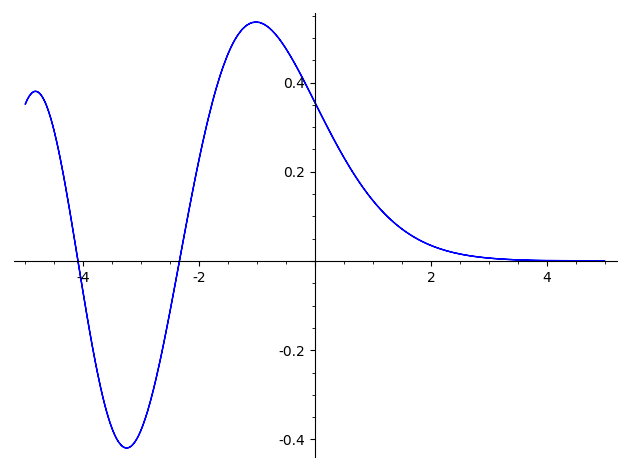

In [63]:
from ore_algebra.analytic.function import DFiniteFunction
P.<x> = QQ[]
A.<Dx> = OreAlgebra(P)
f = DFiniteFunction(Dx^2 - x,
        [1/(gamma(2/3)*3^(2/3)), -1/(gamma(1/3)*3^(1/3))],
        name='my_Ai')
f.plot((-5,5))